### Load/Create the test set

In [1]:
import random
import Bio.SeqIO as SeqIO
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.base import  TransformerMixin
from Bio import motifs
import tqdm
import pickle

### Load the sequences


In [2]:
import random 
sample_size = 5000
sequences = random.sample([str(rec.seq) for rec in SeqIO.parse("/var/tmp/xhorvat9_dip/TestingPredictions/LTRs.fasta", "fasta")], sample_size) + random.sample([str(rec.seq) for rec in SeqIO.parse("/var/tmp/xhorvat9_dip/TestingPredictions/non_LTRs.fasta", "fasta")], sample_size)
labels = [1]*sample_size + [0]*sample_size

### Load the models

In [3]:
import BERT_predictor
TF_CNN_BERT_pool_model_path = "./additional_files/TF_CNN_BERT_pool_model"
BP = BERT_predictor.BERTPredictor(TF_CNN_BERT_pool_model_path)
BERT_predictions = BP.predict(sequences)

100%|██████████| 722/722 [00:41<00:00, 17.19it/s]


23/23 [==============================] - 0s 741us/step


In [4]:
import NN_predictor

NN = NN_predictor.NNPredictor()
NN_predictions = NN.predict(sequences)

2023-05-14 14:55:34.819801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-05-14 14:55:34.820189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-05-14 14:55:34.820263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

350
  1/195 [..............................] - ETA: 52s

2023-05-14 14:55:38.168029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 14:55:38.169215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 14:55:38.169957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

195/195 [==============================] - 7s 35ms/step
700
 1/96 [..............................] - ETA: 27s

2023-05-14 14:55:45.790786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 14:55:45.791921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 14:55:45.792675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

96/96 [==============================] - 5s 50ms/step
2000


2023-05-14 14:55:51.230621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 14:55:51.231911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 14:55:51.232658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23/23 [==============================] - 3s 121ms/step


In [5]:
import GBC_predictor
import pickle
JP = GBC_predictor.JASPARParser()
GBC_pickle_path = "./additional_files/TFIDF_GBC_pipeline.b"
GBCP = pickle.load(open(GBC_pickle_path, "rb"))
GBC_predictions = GBCP.predict(JP.fit_transform(sequences))

100%|██████████| 10000/10000 [22:18<00:00,  7.47it/s]


In [6]:
from sklearn.metrics import accuracy_score, recall_score, recall_score, f1_score, confusion_matrix
print("BERT_accuracy: ",accuracy_score(BERT_predictions, labels))
print("NN_accuracy: ",accuracy_score(NN_predictions, labels))
print("GBC_accuracy: ",accuracy_score(GBC_predictions, labels))

BERT_accuracy:  0.8449
NN_accuracy:  0.6827
GBC_accuracy:  0.7922


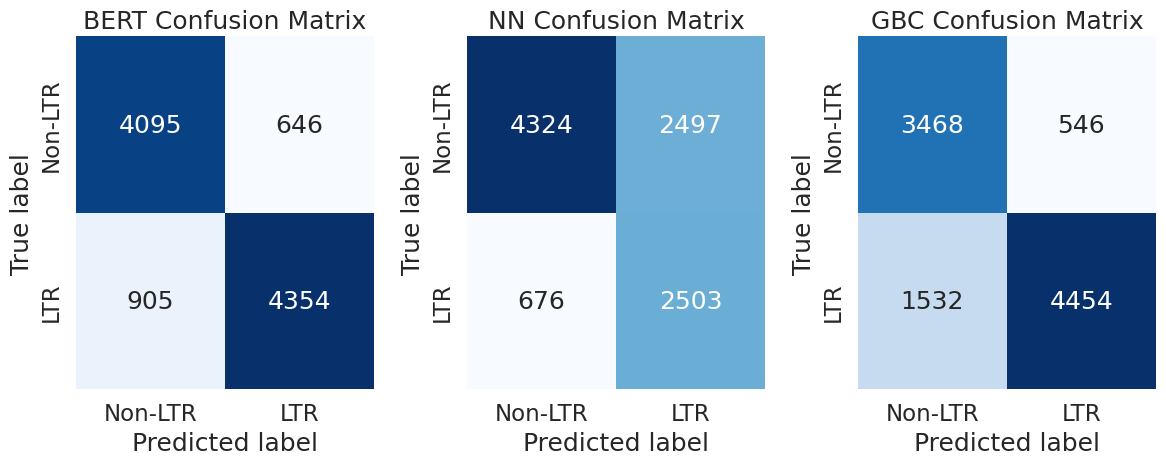

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
sns.set(font_scale=1.5)
x_axis_labels = ['Non-LTR', 'LTR']
y_axis_labels = ['Non-LTR', 'LTR']
sns.heatmap(confusion_matrix(BERT_predictions, labels), annot=True, cmap='Blues', cbar=False, ax=ax[0], fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('BERT Confusion Matrix')

sns.heatmap(confusion_matrix(NN_predictions, labels), annot=True, cmap='Blues', cbar=False, ax=ax[1], fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('NN Confusion Matrix')

sns.heatmap(confusion_matrix(GBC_predictions, labels), annot=True, cmap='Blues', cbar=False, ax=ax[2], fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax[2].set_xlabel('Predicted label')
ax[2].set_ylabel('True label')
ax[2].set_title('GBC Confusion Matrix')


# Show the plot
plt.tight_layout()
plt.show()

### Calculate metrics from the best achieving model

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
cm_BERT = confusion_matrix(labels, BERT_predictions)
specificity = cm_BERT[1,1]/(cm_BERT[1,0]+cm_BERT[1,1])
sensitivity = cm_BERT[0,0]/(cm_BERT[0,0]+cm_BERT[0,1])
mcc = matthews_corrcoef(labels, BERT_predictions)
acc = accuracy_score(labels, BERT_predictions)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("MCC: ", mcc)
print("Accuracy: ", acc)